# CSCI4022 Homework 1; Review

## Due Monday, February 1 at 11:59 pm to Canvas

#### Submit this file as a .ipynb with *all cells compiled and run* to the associated dropbox.

***

Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Here is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 45 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 
- There is *not a prescribed API* for these problems.  You may answer coding questions with whatever syntax or object typing you deem fit.  Your evaluation will primarily live in the clarity of how well you present your final results, so don't skip over any interpretations!  Your code should still be commented and readable to ensure you followed the given course algorithm.

---

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns

## Problem 1 (Numerics... kind of; 15 points)

####  a) Solve for $b$ in the matrix-vector product $$\begin{bmatrix}a_1 & a_2 \\ a_3 & a_4\end{bmatrix} \cdot \begin{bmatrix}x_1\\ x_2\end{bmatrix}=b.$$

####  How many computations does this take, if each multiplication and addition is counted as a separate computation?  

 #### What about for

$$\begin{bmatrix}a_1 & a_2 &a_3 \\ a_4 & a_5 &a_6 \\ a_7&a_8&a_9 \end{bmatrix} \cdot \begin{bmatrix}x_1\\ x_2\\x_3\end{bmatrix}=b?$$

Use the following markdown cell to show all work in computing the exact answer.


---

$\begin{bmatrix}a_1 & a_2 \\ a_3 & a_4\end{bmatrix} \cdot \begin{bmatrix}x_1\\ x_2\end{bmatrix} = 
b = \begin{bmatrix} a_1 \cdot x_1 + a_2 \cdot x_2 \\ 
                     a_3 \cdot x_1 + a_4 \cdot x_2 
     \end{bmatrix}$
     
For the first `b` we're solving for, we have an addition in each row, and two multiplications per row. In this example, `b` has two rows. Thus, we'd have **6 computations**.

---

$\begin{bmatrix}a_1 & a_2 &a_3 \\ a_4 & a_5 &a_6 \\ a_7&a_8&a_9 \end{bmatrix} \cdot \begin{bmatrix}x_1\\ x_2\\x_3\end{bmatrix} = 
    b = \begin{bmatrix} (a_1 \cdot x_1) + (a_2 \cdot x_2) + (a_3 \cdot x_3) \\
                     (a_4 \cdot x_1) + (a_5 \cdot x_2) + (a_6 \cdot x_3) \\ 
                     (a_7 \cdot x_1) + (a_8 \cdot x_2) + (a_9 \cdot x_3) 
     \end{bmatrix}$

For the second `b` we're solving for ($3\times 3 \cdot 3\times 1$), we have two additions in each row, and three multiplications per row and a grand total of 3 rows. Thus, we'd need **15 computations** with this one.

---


####  b) How many computations does matrix-vector computation take if the matrix $A$ is a square $n \times n$ matrix and the vector $x$ is $n \times 1$? 

Visually:

$$\begin{bmatrix} 
    a_{11} & a_{12} & \dots \\
    \vdots & \ddots & \\
    a_{n1} &        & a_{nn} 
    \end{bmatrix}  \cdot \begin{bmatrix}x_1\\ \vdots \\x_n\end{bmatrix}=b$$

Use the following markdown cell to show all work in computing the exact answer.


---

From the previous examples, it's pretty easy to see that there are $n \times n$ multiplications that need to take place as we multiply each column in `A` by each row in `x` which is equal to $n$ (and then multiplied for each row in `A` which is also equal to $n$). As for additions, we have one less addition per row than there are multiplications. So, we could say: $\text{addition} = (n-1)\cdot n$. Thus, the total number of computations required for solving $Ax=b$ for $b$ is given by: $(n \cdot n) + ((n-1) \cdot n) = (n^2) + (n^2 - n) = \boxed{2n^2 -n}$

---

#### c) How many computations does square matrix-matrix multiplication take if each matrix is $n \times n$? 

For example:

$$\begin{bmatrix} 
    a_{11} & a_{12} & \dots \\
    \vdots & \ddots & \\
    a_{n1} &        & a_{nn} 
    \end{bmatrix} \cdot 
    \begin{bmatrix} 
    b_{11} & b_{12} & \dots \\
    \vdots & \ddots & \\
    b_{n1} &        & b_{nn} 
    \end{bmatrix}=C$$
    
Hint: how many computations for the entry $c_{ij}$ in row $i$, column $j$?

If $n=10^4$, what number is this?

---

So right off the bat, I was able to figure out that there are $n^3$ multiplication computations in square matrix multiplication. Similar to Matrix-vector multiplication, we have $(n-1) \cdot n^2$ addition computations per square matrix multiplication. This can be simplified to $(n^3) + (n^2 \cdot (n-1)) = (n^3) + (n^3 - n^2) = 2n^3 - n^2$.

Plugging in $n=10^4$ to our equation above, we'd get: $2n^3 - n^2 = 2(10^4)^3 - (10^4)^2 = 2(10^{12}) - 10^8 = 2,000,000,000,000 - 1,000,000,000 = 1999900000000 = 1.9999\text{e}12$

So we'd need: **1.9999e12 computations**.

---

## Problem 2 (Distances and Plots; 15 points)

In this problem we will create what's known as a [*variogram*](https://en.wikipedia.org/wiki/Variogram), a plot that describes how much "distance between inputs matters" on a function that inputs locations and outputs some other variable of interest.  Click on the link to see what a variogram often looks like.

Variograms involve similar groupings to histograms, but instead of grouping data points by their actual values, they group *distances* (Euclidean, $L_2$ norm) between data points together on the $x$ axis.

We consider 4 functions.  f1 and f2 below are smooth, well defined trig functions, although one has a shorter period and larger amplitude than the other.  f3 and f4 add random noise - uniform and normal, respectively - to those first functions.

Note also the given code includes a way to plot 3D data (input $x_1$, $x_2$, output $f(x_1,x_2)$) in python as a heat map.

In [2]:
x = np.linspace(0, 1, 20)
y = np.linspace(0, 1, 20)
X, Y = np.meshgrid(x, y)
print("x: ", x)
print("y: ", y)
print("X: ", X)
print("Y: ", Y)
def f1(x, y):
    return np.sin(7*x+7)+3*np.sin(6*y)
Z1 = f1(X, Y)

def f2(x, y):
    return np.sin(10*x)+np.cos(10*y)
Z2 = f2(X, Y)
random.seed(4022)
Z3=Z1+(np.random.rand(20, 20))
Z4=Z2+(np.random.normal(0, 1, size=(20,20)))

x:  [0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]
y:  [0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]
X:  [[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
  0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
  0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
  0.94736842 1.        ]
 [0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
  0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
  0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
  0.94736842 1.        ]
 [0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
  0.31578947

Text(0.5, 1, 'Function 4: 2 plus normals')

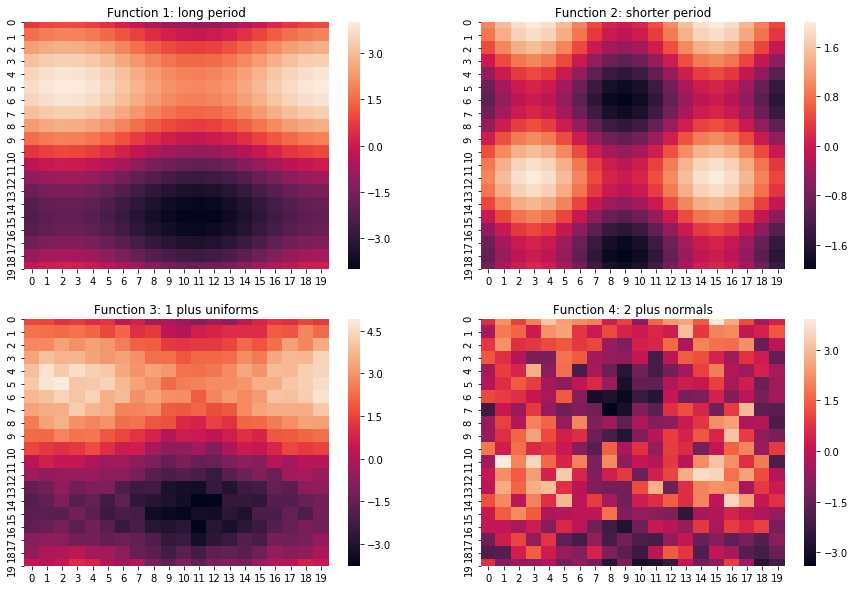

In [3]:
fig, axs = plt.subplots(2, 2,figsize=(15,10))
sns.heatmap(Z1, ax=axs[0,0])
axs[0,0].set_title('Function 1: long period')
sns.heatmap(Z2, ax=axs[0,1])
axs[0,1].set_title('Function 2: shorter period')
sns.heatmap(Z3, ax=axs[1,0])
axs[1,0].set_title('Function 3: 1 plus uniforms')
sns.heatmap(Z4, ax=axs[1,1])
axs[1,1].set_title('Function 4: 2 plus normals')

### Creating your own Variogram

For each of the 4 data sets, perform the following calculations, then create a 2x2 plot corresponding to the figure above where you depict the *variograms* of the 4 data sets.

##### a) Calculate all pairwise distances

Suppose we have a function $f$.  To create a variogram of $f$ given a set of observations,

- Take each and every pair of distinct data values $x=(x_1,x_2)$ and $y=(y_1,y_2)$, and computes the distance between those inputs $d((x_1, x_2), (y_1, y_2))$ and the squared distance between their outputs, $(f(x)-f(y))^2$.  If we had $n$ total data points there are $\binom{n}{2}$ such pairs.

Starting with the given code, you can get this by creating tuples out of the `X` and `Y` arrays.

Note that your distance matrix might be as large as $400\times 400$ for the given problem, although you may only need to fill around half of it due to its symmetry.

NB: You may also choose to create a numpy array of distances instead of a matrix if you prefer!

You should also calculate all pairwise squared deviations $(f(x)-f(y))^2$ in the same or a similar structure to your distance object.

In [4]:
def get_distance(p1, p2):
    # just a simple reworking of the Euclidian distance/pythagorean equation
    return np.sqrt(((p2[0] - p1[0]) ** 2) + ((p2[1] - p1[1]) ** 2))

# distances = np.zeros((400, 400))

distances = []
z1s       = []
z2s       = []
z3s       = []
z4s       = []

In [5]:
pts = [(i, j) for i in range(len(x)) for j in range(len(y))]

for pt in pts:
    for pt2 in pts:
        if pt == pt2:
            distances.append(0)
        else:
            distances.append(get_distance(pt, pt2))
        z1s.append((Z1[pt] - Z1[pt2]) ** 2)
        z2s.append((Z2[pt] - Z2[pt2]) ** 2)
        z3s.append((Z3[pt] - Z3[pt2]) ** 2)
        z4s.append((Z4[pt] - Z4[pt2]) ** 2)

print(len(distances))
print(len(z1s))
print(len(z2s))
print(len(z3s))
print(len(z4s))

160000
160000
160000
160000
160000


##### b) bin your data by distance

You should now have two lists/objects/matrices of total entires equal to $\binom{400}{2}$.  One holds distances, the other squared differences of $f$.

- Create "bins" as in a histogram.  Starting at $d=0$ and ending at the maximum observed distance, group each of the $(d(x,y), (f(x)-f(y))^2))$ pair into 20 total bins according to their distance.  So some points will go into the interval from $$[0, \frac{\max_{x,y} d(x,y)}{20}),$$ some into $$[\frac{\max_{x,y} d(x,y)}{20},2 \frac{\max_{x,y} d(x,y)}{20}),$$, and so forth.

##### c) Create local averages

For each of the (hundreds!) of points within each bin, take the mean value of the $(f(x)-f(y))^2))$ deviations in that bin.

You should have a list of 20 average values.


##### d) Create variograms

A variogram is a line plot with the center of each bin (the bins in part b) on the $x$-axis and the average squared deviation of points within that bin (found in part c) on the $y$-axis.

In the same 2x2 structure as the given code at the start of the problem, plot the 4 variograms for $F1, F2, F3,$ and $F4).


##### e) Interpret the variograms.  What do different values or features on the variograms appear to correspond to in terms of the shapes of the functions and added randomness of the 4 data sets?


Honestly, I couldn't even get a distances matrix up and running. The problem set-up was an absolute nightmare in my opinion although I recognize it's still a problem I should've been able to solve. I did a list, but this seemed really messy and I didn't really get how to combine this with the deviations. Furthermore, I now had 5 seperate objects all containing 16,000 items which confused me because they all should have only had 400 items.

I really sturggled to see how much of this stuff tied into our lectures as well (AND LOOK, I LOVE THIS CLASS AND FIND IT ENDLESSLY FASCINATING). Obviously this is an advanced course so I'd get a little bit of this, but I was really in the dark for this one... Just bummed/embarassed I couldn't manage to get the distance matrix up and running even though I didn't spend enough time on this assignment.

## Problem 3 (Hypothesis Simulation; 15 points)


One question we will often be tasked with in the semester is asking what "random" looks like.  In hypothesis testing, we typically ask "what is the probability of observing *this* test statistic if everything is fair/random."  We can then do so for a variety of test statistics (`Z`, `T`, proportions, sample variances, etc.) to draw conclusions like "That doesn't look random!  It's extremely unlikely to happen under the **null hypothesis**, so we reject that hypothesis."

As we develop new tools this semester, simulation can help us determine what our tools do if everything is random, which helps provide context to the answers we get on real data - which ideally includes a real signal in it that we want to discover.

### How correlated is really correlated?

The code below simulates from the bivariate normal distribution, which we'll use later this semester.  In brief, it simulates a list of points (called `rnorms` below) as an $j \times 2$ array where each of the `j` rows is an $(x,y)$ point.  We can either simulate these two column vectors $X$ and $Y$ so they're actually independent and the true correlation coefficient $\rho_{xy}=0$ OR we can simulate them with actual correlations included.

We want to know how much correlation is required for us to be able to meaningfully detect it.  Note that our simulated "*sample*" correlation coefficients never actually match the true value!

Example code:

Blue correlation coefficient: [[ 1.         -0.26019825]
 [-0.26019825  1.        ]]
Red correlation coefficient: [[1.         0.80108564]
 [0.80108564 1.        ]]


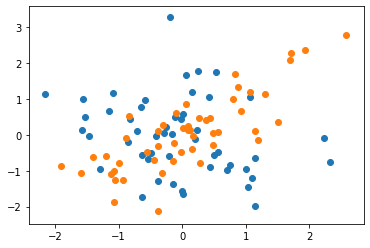

In [6]:
rho=0
rnorms=np.random.multivariate_normal([0,0], [[1,rho],[rho,1]],50)  #sample of size j=50 indepenent N(0,1)
print('Blue correlation coefficient:', np.corrcoef(rnorms[:,0],y=rnorms[:,1]))
plt.scatter(rnorms[:,0],y=rnorms[:,1]) #sanity check... do they look uncorrelated?

rho=.8
rnorms=np.random.multivariate_normal([0,0], [[1,rho],[rho,1]],50)  #sample of size j=50 rho=.8 N(0,1)
print('Red correlation coefficient:', np.corrcoef(rnorms[:,0],y=rnorms[:,1]))
plt.scatter(rnorms[:,0],y=rnorms[:,1]) #sanity check... do they look correlated?

##### a) Our goal is to understand at what point we can actually tell whether or not things are correlated. To this end, let the example code above guide you to code that allows you to:

 - i) Generate a sample of `j=10` bivariate normals (of mean 0, variance 1) that are uncorrelated.  Calculate the correlation of this sample.
 - ii) Repeat step `i` 1000 times.  Save all 1000 correlation coefficients.
 - iii) Repeat steps `i` and `ii` for `j=100` and `j=1000`.  We now have 3000 correlation coefficients across 3 values of `j`.
 


In [7]:
mean       = 0
var        = 1
num_trials = 1000


rho        = 0

coeffs     = []

for n in range(1,4):
    j = 10 ** n
    for i in range(num_trials):
        rnorms = np.random.multivariate_normal([mean, mean], [[var, rho],[rho, var]], j)
        coeff  = np.corrcoef(rnorms[:,0],y=rnorms[:,1])
        coeffs.append(coeff[0, 1])

Consider testing the null hypothesis:
  - $H_0:$ These samples are uncorrelated
  
  against the alternative
  
  - $H_a:$ These samples have $\rho_{xy} \ne 0$.
  
#### b) At what sample correlations do we reject the null hypothesis if we set a probability of Type I error equal to .05?

This defines the *rejection region* for a statistical test of whether correlation is nonzero!

In [8]:
j10_sample    = coeffs[0:1000]
print("Just making sure j10_sample is 1000 items... ", len(j10_sample))
j10_sim_coeff = np.percentile(np.abs(j10_sample), 95)
print("When j=10, we'd reject the null with a sample correlation larger than: ", j10_sim_coeff)

Just making sure j10_sample is 1000 items...  1000
When j=10, we'd reject the null with a sample correlation larger than:  0.6154747297607654


In [9]:
j100_sample    = coeffs[1000:2000]
print("Just making sure j100_sample is 1000 items... ", len(j100_sample))
j100_sim_coeff = np.percentile(np.abs(j100_sample), 95)
print("When j=100, we'd reject the null with a sample correlation larger than: ", j100_sim_coeff)

Just making sure j100_sample is 1000 items...  1000
When j=100, we'd reject the null with a sample correlation larger than:  0.20016210409729746


In [10]:
j1000_sample    = coeffs[2000:]
print("Just making sure j1000_sample is 1000 items... ", len(j1000_sample))
j1000_sim_coeff = np.percentile(np.abs(j1000_sample), 95)
print("When j=1000, we'd reject the null with a sample correlation larger than: ", j1000_sim_coeff)

Just making sure j1000_sample is 1000 items...  1000
When j=1000, we'd reject the null with a sample correlation larger than:  0.06177729571092471


In [11]:
# Not really sure what I'm doing here, but this allowed me to get a power other than: 0.05... 
# I feel like the hypothesis test by definition/design is supposed to find 95% of the values that fit within the
# interval.
sim_coeff = j100_sim_coeff

---

I initially had to remind myself of what type I error is, and just to reiterate here, this question is basically setting the probability for false-positives to $5%$. In terms of what a false-positive means in this context, we'd reject the null hypothesis and we conclude that there **is** correlation when there in fact is not (and the null hypothesis was true all along).

I liked Zach's suggestion to hit the samples with `np.abs` and then take a one-tailed test as it definitely felt like it'd simplify things a little. Now, with the way I've set up the tests, we are going to reject the null hypothesis for any coefficient larger than the values I found above. More specifically, when $j=100$ we'd conclude that $0.18949$ is the upper limit for **no** correlation. Any simulated correlation coefficients larger than $0.18949$ gives us a $95%$ chance that the sample is correlated. Finally, I feel like $j=100$ is definitely sufficiently large enough for us to use this value as our baseline that we use in the next two parts... Not 100% if I was on the right track...

---

#### c) Use additional simulations as in part a) to determine the power of our test in b) when `j=10`, `j=100`, and `j=1000` if the true correlation coefficient is $\rho=.1$.

Recall: power is defined as the probability of rejecting the null hypothesis - or being in the rejection region from part b) - when the true correlation was nonzero.  

In [12]:
rho    = 0.1

for n in range(1,4):
    j = 10 ** n
    coeffs = []
    for i in range(num_trials):
        rnorms = np.random.multivariate_normal([mean, mean], [[var, rho],[rho, var]], j)
        coeff  = np.corrcoef(rnorms[:,0],y=rnorms[:,1])
        coeffs.append(coeff[0, 1])
#     sim_coeff = np.percentile(np.abs(coeffs), 95)
    num_above = np.sum([0 if np.abs(coeff) < sim_coeff else 1 for coeff in coeffs])
    power = num_above / num_trials
    print("When j={}, the power of the test is {:0.5f}".format(j, power))

When j=10, the power of the test is 0.61200
When j=100, the power of the test is 0.16900
When j=1000, the power of the test is 0.00000


Sooo, I gave this my all, just a crazy weekend and not enough time. **Obviously** the power of the tests being 0.05 for every test doesn't make a whole lot of sense. But I had absolutely no idea where we were supposed to get the sample correlation coefficient we were supposed to use as a baseline to test with. Finally, I just went with the one I got during the $j=100$ sample because it actually gave me different powers. However, after doing this, I was still particularly confused because I had no idea how this would show anything of value. Obviously the power would be higher when $j=10$ and lower when $j=1000$ and it would be closest to the value for our orignal sample $j=100$.

#### d) Use additional simulations as in part a) to determine the power of our test in b) when `j=10`, `j=100`, and `j=1000` if the true correlation coefficient is $\rho=-.1$.  Should this differ from part c)?

In [13]:
rho    = -0.1

coeffs = []

for n in range(1,4):
    j = 10 ** n
    coeffs = []
    for i in range(num_trials):
        rnorms = np.random.multivariate_normal([mean, mean], [[var, rho],[rho, var]], j)
        coeff  = np.corrcoef(rnorms[:,0],y=rnorms[:,1])
        coeffs.append(coeff[0, 1])
#     sim_coeff = np.percentile(np.abs(coeffs), 95)
    num_above = np.sum([0 if np.abs(coeff) < sim_coeff else 1 for coeff in coeffs])
    power = num_above / num_trials
    print("When j={}, the power of the test is {:0.5f}".format(j, power))

When j=10, the power of the test is 0.59700
When j=100, the power of the test is 0.14800
When j=1000, the power of the test is 0.00100


We get really similar values in the last part, which makes sense because the rho is the same magnitude as in the last part and the way I perform the tests by taking the absloute values of the coefficients.